In [1]:
from toolbox import *
from music21 import *
import time

In [2]:
environment.set("musescoreDirectPNGPath",r"C:\Program Files\MuseScore 3\bin\MuseScore3.exe")

UserSettingsException: attempting to set a value to a path that does not exist: /home/ludmila/qumusic-reduction/src/C:\Program Files\MuseScore 3\bin\MuseScore3.exe

In [131]:
file = converter.parse('bach-air-score.mid')
file.show('text')

{0.0} <music21.stream.Part 0x1c584ac1e80>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.instrument.Instrument ''>
        {0.0} <music21.instrument.Violin 'Violin'>
        {0.0} <music21.instrument.Violin 'violin'>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark largamente Quarter=30.0>
        {0.0} <music21.key.Key of D major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note F#>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.stream.Voice 0x1c5843f3640>
            {0.0} <music21.note.Note F#>
            {0.5} <music21.note.Note B>
            {0.75} <music21.chord.Chord G5 F#5>
            {1.0} <music21.note.Note E>
            {1.25} <music21.note.Note D>
            {1.5} <music21.note.Note C#>
            {1.75} <music21.note.Note D>
            {2.0} <music21.note.Note C#>
            {3.0} <music21.note.Note B>
            {3.25} <music21.note.Rest dotted-eighth

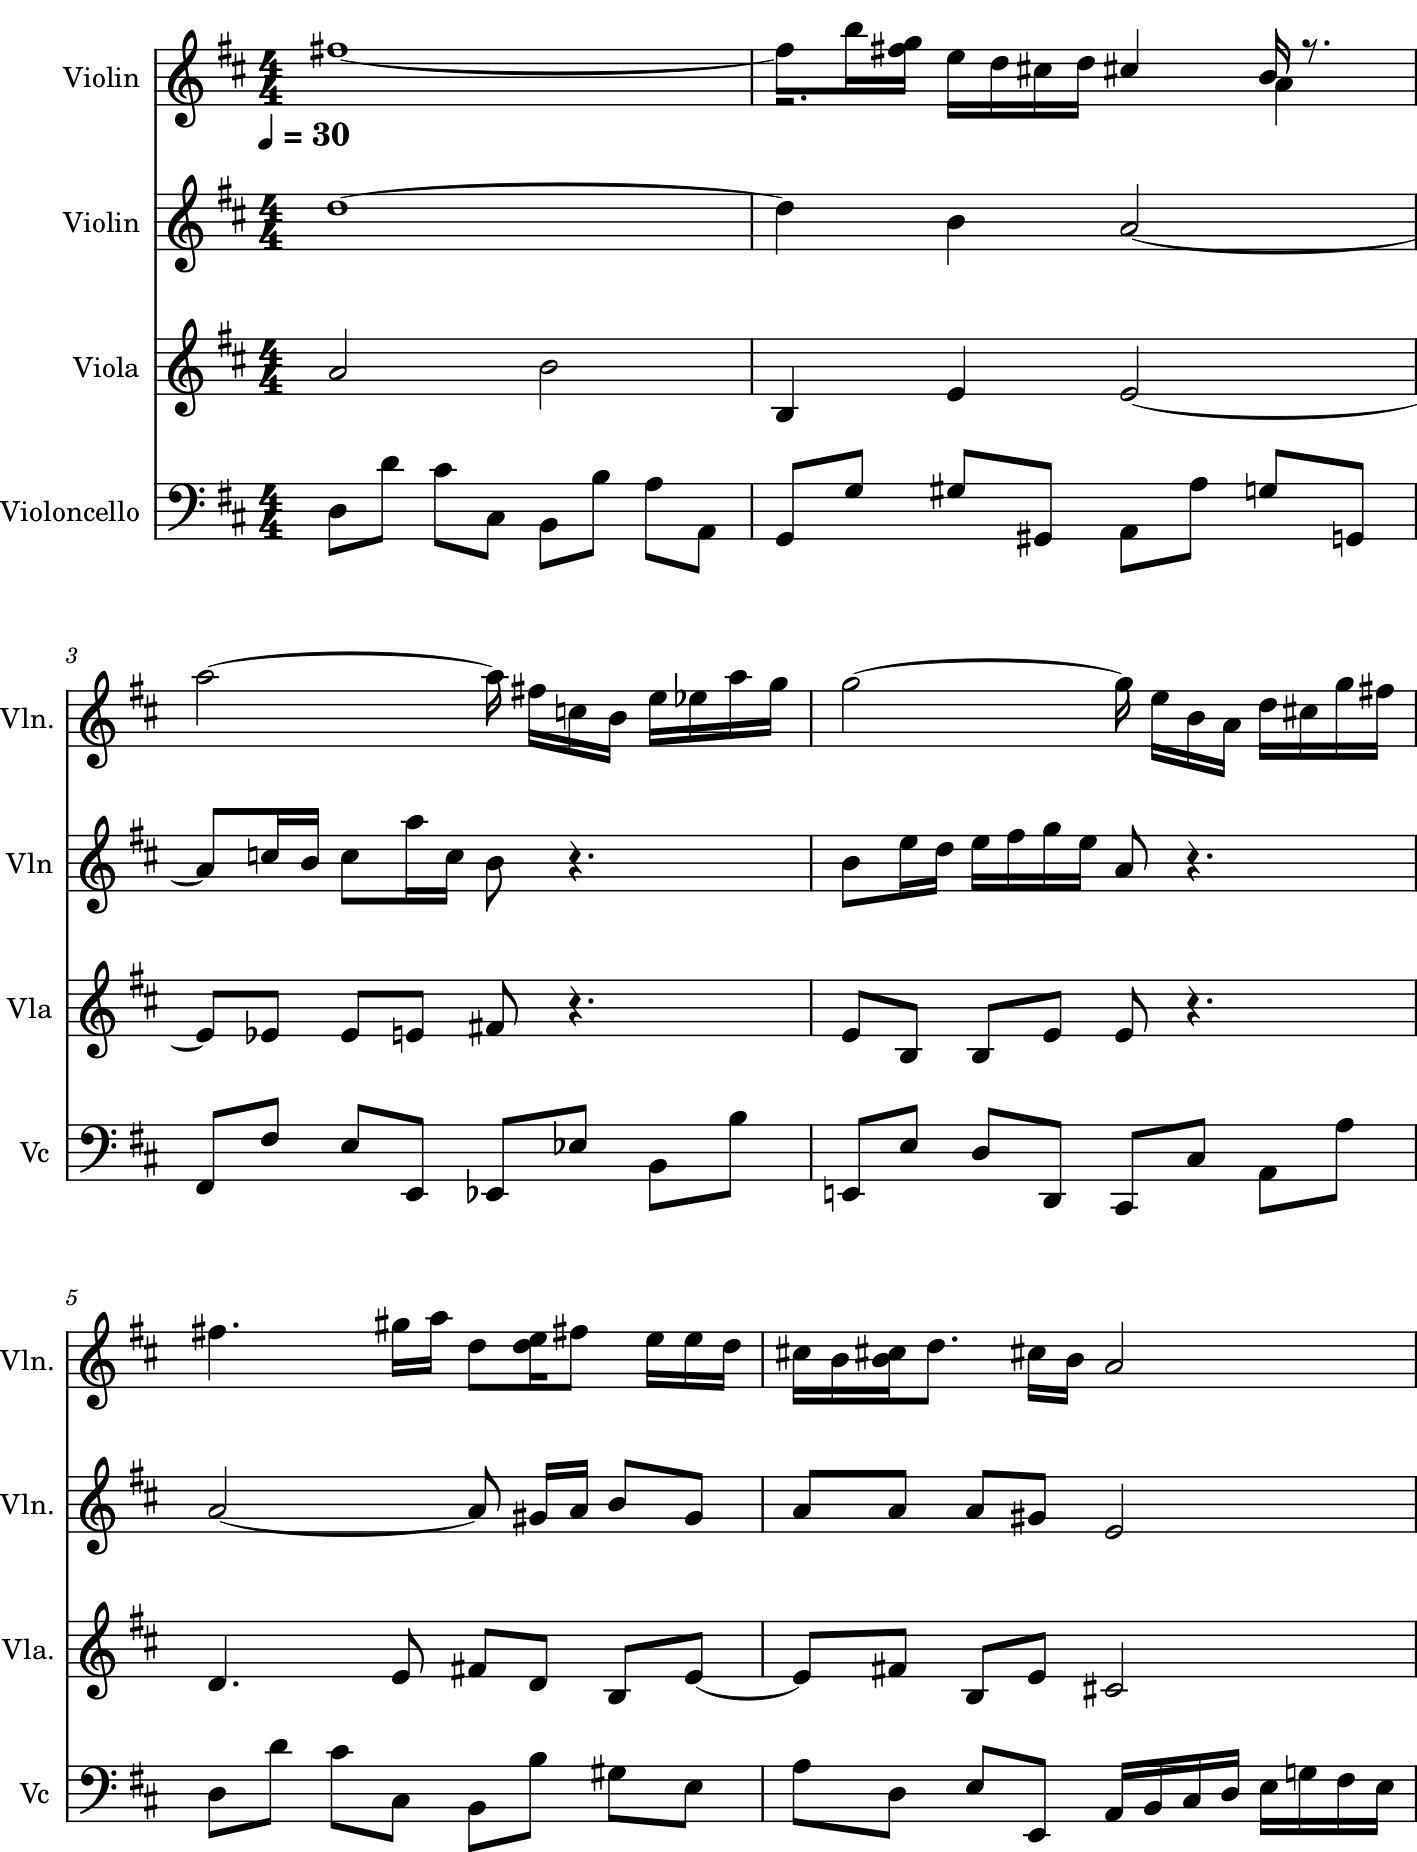

In [39]:
# file.parts[3].measure(77).show()
file.show()

In [8]:
def get_pitches(phrase):
    pitches_list = []
    for nt in phrase.flat.getElementsByClass(['Note','Chord']):
        pitches_list.append(nt.pitches[-1].ps)
    return pitches_list

In [263]:
pitch_int[0]

[1,
 6,
 5,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 13,
 4,
 7,
 2,
 6,
 2,
 7,
 3,
 1,
 4,
 6,
 3,
 6,
 2,
 7,
 2,
 1,
 3,
 2,
 8,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 5,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 5,
 2,
 2,
 3,
 3,
 5,
 13,
 10,
 2,
 13,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 4,
 5,
 3,
 3,
 10,
 3,
 2,
 3,
 3,
 6,
 13,
 3,
 3,
 2,
 2,
 3,
 3,
 6,
 5,
 3,
 1,
 4,
 2,
 1,
 4,
 3,
 1,
 11,
 5,
 4,
 4,
 1,
 4,
 3,
 2,
 3,
 8,
 5,
 4,
 4,
 2,
 10,
 2,
 4,
 4,
 9,
 3,
 8,
 3,
 1,
 3,
 4,
 6,
 2,
 3,
 3,
 2,
 2,
 2,
 1]

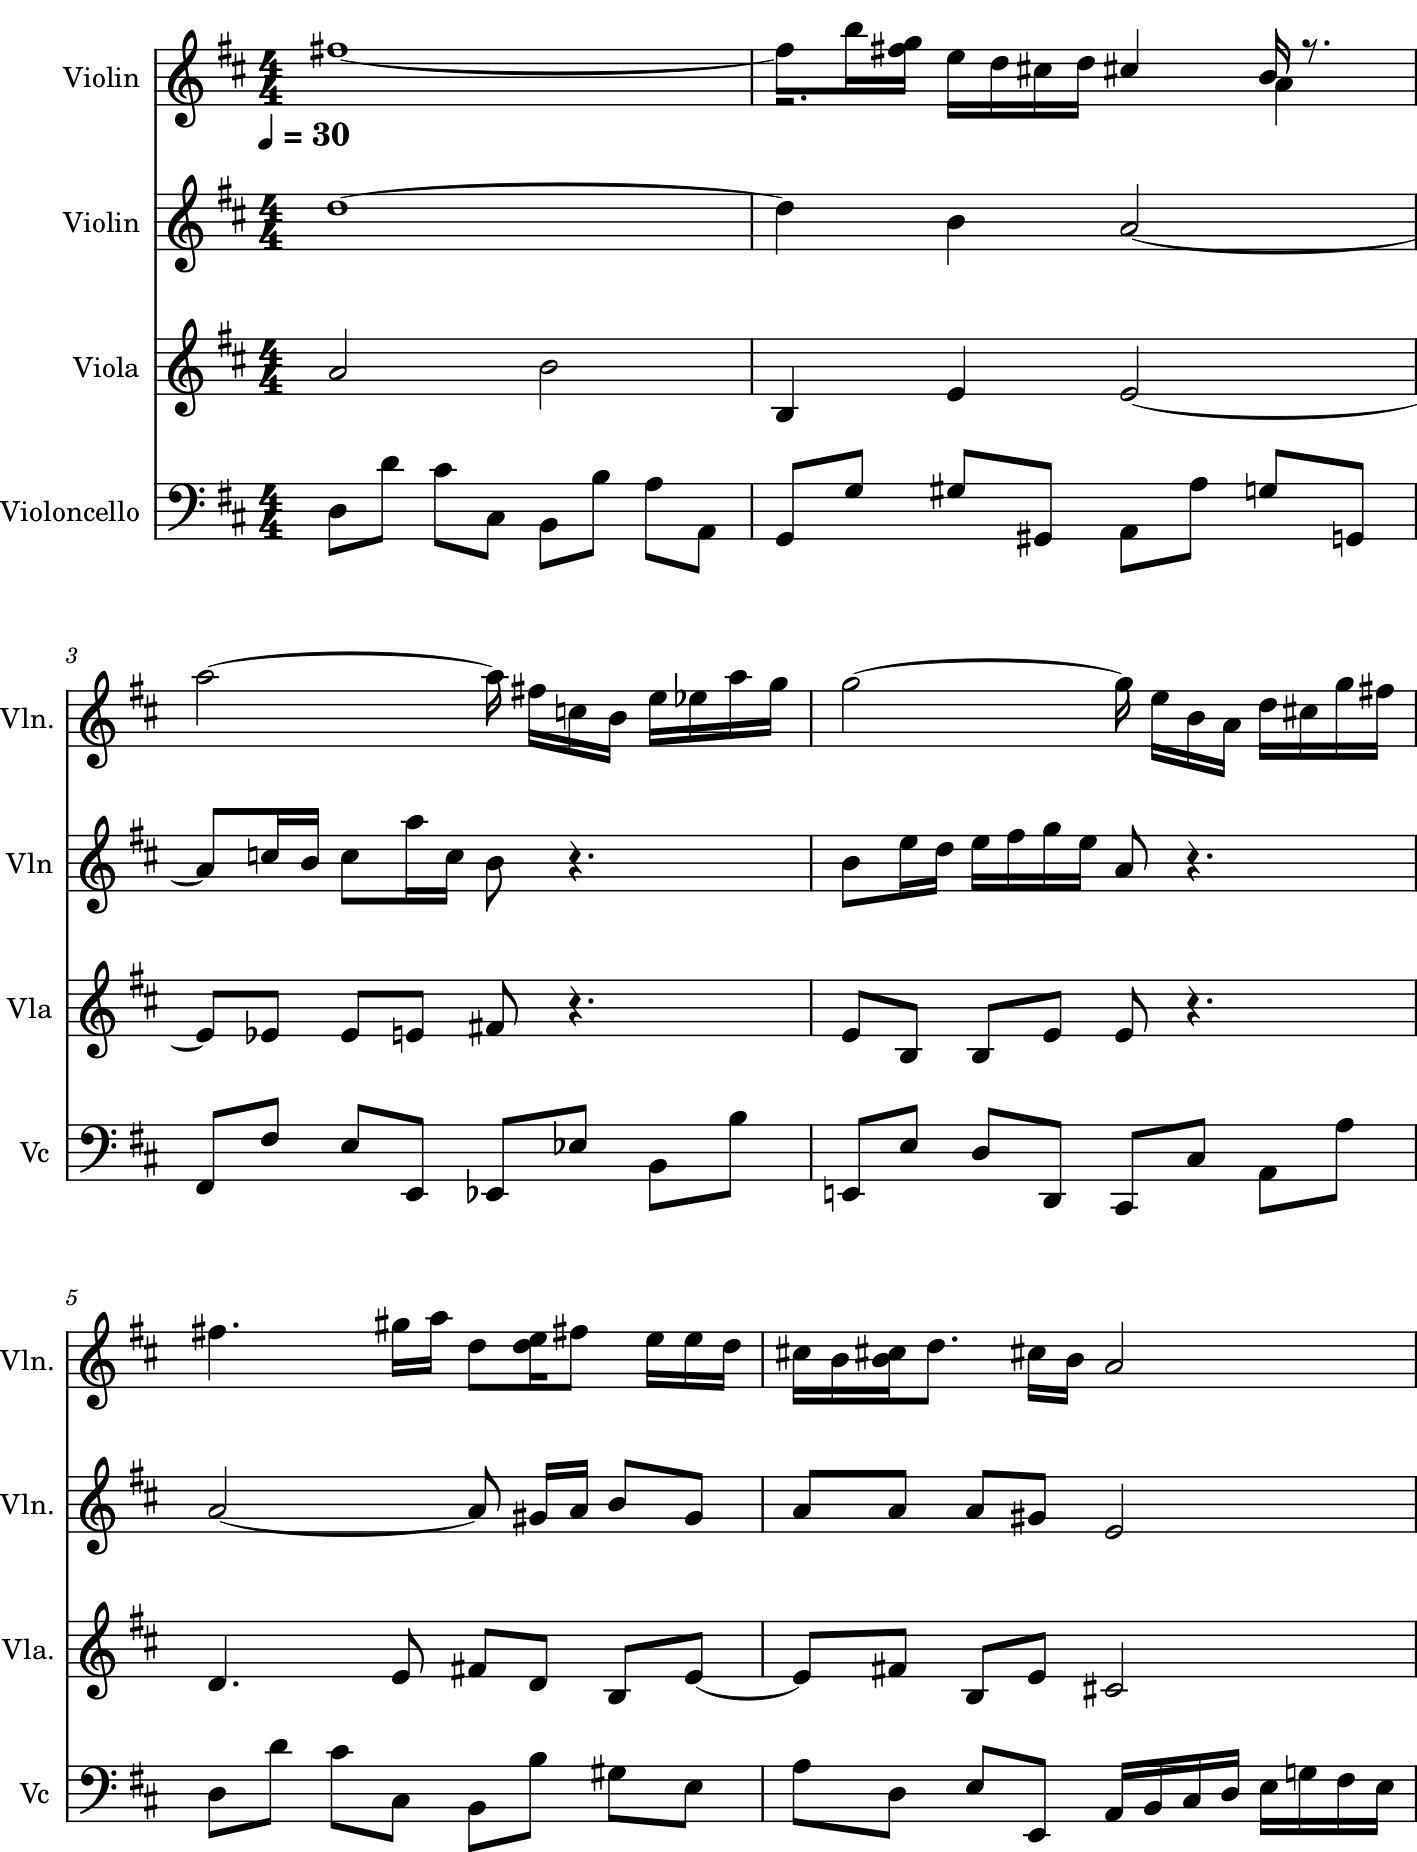

None


In [78]:
print(file.parts.show())

In [262]:
from collections import defaultdict
pitch_int = defaultdict(list)
for i, part in enumerate(file.parts):
    for p1,p2 in zip(part.pitches, part.pitches[1:]):
        intvl = interval.Interval(p1,p2)
        pitch_int[i].append(abs(intvl.chromatic.semitones)+1)

In [209]:
ioi = defaultdict(list)
for i, part in enumerate(file.parts):
    notes = part.flat.getElementsByClass(['Note','Chord'])
    for n1,n2 in zip(notes,notes[1:]):    
        ioi[i].append(n2.offset-n1.offset)

In [210]:
rests = defaultdict(list)
for i, part in enumerate(file.parts):
    rs = part.flat.getElementsByClass(['Rest'])
    for rest in rs:
        rests[i].append(rest.duration.quarterLength + 1/100)

In [231]:
def get_doc(no_parts, intervals):
    rdict = defaultdict(lambda: [0])
    for i in range(no_parts):
        rdict[i] += [abs(int2-int1)/(int1+int2) for int1,int2 in zip(intervals[i],intervals[i][1:])]
    return rdict

In [232]:
no_parts = len(file.parts)
rpitch = get_doc(no_parts,pitch_int)
rioi = get_doc(no_parts,ioi)
rrests = get_doc(no_parts,rests)

In [251]:
def get_strength(no_parts,intervals,doc):
    sdict = defaultdict(list)
    for i in range(no_parts):
        slist = [intervals[i][j+1]*(doc[i][j]+doc[i][j+1]) for j in range(len(intervals[i])-1)]
        s = sum(slist)
        normed_s = [r/s for r in slist]
        sdict[i] = normed_s
    return sdict

In [252]:
spitch = get_strength(no_parts,pitch_int,rpitch)
sioi = get_strength(no_parts,ioi,rioi)
#srest = get_strength(no_parts,rests,rrests)

In [277]:
for i in range(no_parts):
    lbsp[i] = [0.25*pitch+0.75*ioi for pitch,ioi in zip(spitch[i],sioi[i])]

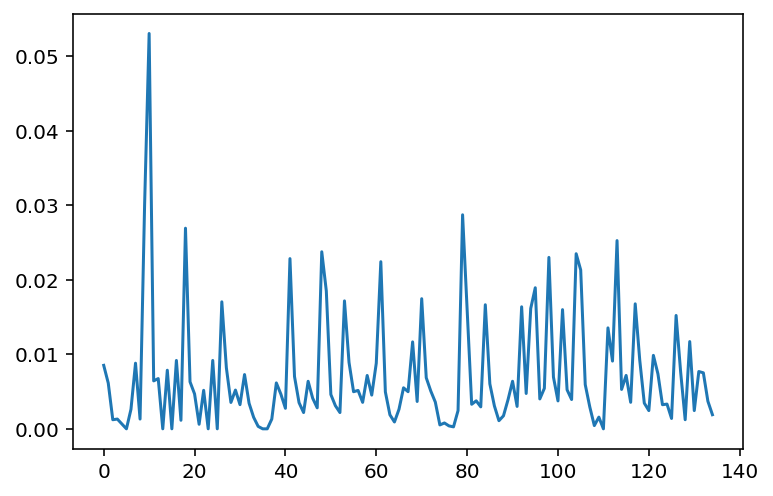

In [278]:
import matplotlib.pyplot as plt
plt.plot(lbsp[0])

In [279]:
def find_maxima(a,threshold):
    mlist = []
    for i in range(1,len(a)-1):
        if a[i]>a[i+1] and a[i-1]<a[i] and a[i]>threshold :
            mlist.append(i)
    return mlist

In [280]:
find_maxima(lbsp[0],0.02)

[10, 18, 41, 48, 61, 79, 98, 104, 113]

In [14]:
def get_entropy_from_measure(file,track,measure):
    E_p = get_pitches(file.measure(measure).parts[track])
    E_r = get_rhythm(file.measure(measure).parts[track])
    E_s = get_rests(file.measure(measure).parts[track])
    total_entropy = get_list_entropy(E_p) + get_list_entropy(E_r)+ get_list_entropy(E_s)
    return total_entropy

In [44]:
file.measure(1).parts[2].show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Instrument ''>
    {0.0} <music21.instrument.Viola 'Viola'>
    {0.0} <music21.instrument.Viola 'viola'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark largamente Quarter=30.0>
    {0.0} <music21.key.Key of D major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Note A>
    {2.0} <music21.note.Note B>


In [70]:
for a in file.parts[2].measure(1).getElementsByClass(tempo.MetronomeMark):
    print(type(a))
# for a in file.parts[2].measure(1).getElementsByClass(tempo.MetronomeMark):
#     print(a.referent.type)
'MetronomeMark' in a.classes

<class 'music21.tempo.MetronomeMark'>


True

In [19]:
def max_num_measures(file):
    return max([len(p) for p in file.parts])    

def get_entropy_dict(file):
    entropy_dict = {}
    for j in range(1,max_num_measures(file)+1):
        for i in range(len(file.parts)):
            if file.parts[i].measure(j) != None:
                entropy_dict[i,j] = get_entropy_from_measure(file,i,j)
    return entropy_dict

t0= time.time()
entropy_dict = get_entropy_dict(file)
t1 = time.time() - t0
print(t1)

1.106907606124878


In [20]:
from pyqubo import Binary, Constraint

def max_num_measures(file):
    return max([len(p) for p in file.parts])    

def qubo_form_from(entropy_dict):
    H = 0
    for j in range(1,max_num_measures(file)+1):
        c = 0
        o = 0
        for i in range(len(file.parts)):
            if (i,j) in entropy_dict.keys():
                c += Binary(f"x_{i}_{j}")
                o += entropy_dict[i,j]*Binary(f"x_{i}_{j}")
        H += Constraint(5*(2-c)**2, f"measure_{j}") - o
    return H.compile().to_qubo()

# def qubo_form_from(file,entropy_dict):
#     H = 0
#     for j in range(1,max_num_measures(file)+1):
#         c = 0
#         o = 0
#         for i in range(len(file.parts)):
#             if file.parts[i].measure(j) != None:
#                 c += 5*Binary(f"x_{i}_{j}")
#                 o += entropy_dict[i,j]*Binary(f"x_{i}_{j}")
#         H += Constraint((2-c)**2, f"measure_{j}") - o
#     return H.compile().to_qubo()

In [22]:

qubo_form = qubo_form_from(entropy_dict)



In [23]:
print(qubo_form[1])

380.0


In [24]:
from dwave.system import EmbeddingComposite, DWaveSampler
from neal import SimulatedAnnealingSampler
import pandas as pd
sampler = SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(qubo_form[0],
                         num_reads = 100,
                         label='Example -')
# sampleset.to_pandas_dataframe()

In [27]:
solution = sampleset.first[0]
# print(solution)

search_value = 1
found_key = [key for key, value in solution.items() if value == search_value]
# print(found_key)
ij_keys = []
for key in found_key: 
    ij_keys.append(list(map(int,key.rsplit("_")[1:3])))

check_list = np.array(ij_keys)[:,1]
unique,counts = np.unique(check_list,return_counts=True)
print('The number of selected measures is {}. We are expecting {}'.format(len(ij_keys),2*77)) 
print(counts)
# for i in range(1,78):
#     if i in unique:
#         continue
#     else:
#         print('Measure %{} missing'%{i})
#     if counts[i] != 2:
#         print('Measure %{} with %{}'%{i,counts[i]})

The number of selected measures is 38. We are expecting 154
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
a = np.array(ij_keys)
# print(a)
a_sorted = sorted(ij_keys, key=lambda element: (element[1])) 


In [62]:
new_arrange = stream.Stream()
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

for a in file.parts[1].measure(1).getElementsByClass(tempo.MetronomeMark):
    p1.append(a)
    p0.append(a)

In [63]:
for i in a_sorted:
    print(i)
    for element in file.parts[i[0]].measure(i[1]).getElementsByClass('Instrument'):
        print(file.parts[i[0]].measure(i[1]))

[2, 1]
<music21.stream.Measure 1 offset=0.0>
<music21.stream.Measure 1 offset=0.0>
<music21.stream.Measure 1 offset=0.0>
[3, 1]
<music21.stream.Measure 1 offset=0.0>
<music21.stream.Measure 1 offset=0.0>
<music21.stream.Measure 1 offset=0.0>
[0, 2]
[3, 2]
[2, 3]
[3, 3]
[0, 4]
[3, 4]
[0, 5]
[1, 5]
[0, 6]
[3, 6]
[0, 7]
[3, 7]
[0, 8]
[3, 8]
[0, 9]
[3, 9]
[0, 10]
[3, 10]
[2, 11]
[3, 11]
[1, 12]
[3, 12]
[0, 13]
[3, 13]
[1, 14]
[3, 14]
[2, 15]
[3, 15]
[1, 16]
[3, 16]
[0, 17]
[3, 17]
[0, 18]
[2, 18]
[0, 19]
[3, 19]


In [64]:
for i in a_sorted:        
    for element in file.parts[i[0]].measure(i[1]).getElementsByClass(['Note', 'Rest']):
        if a_sorted.index(i) % 2 == 0:
            p0.append(element)
        else:
            p1.append(element)
new_arrange.insert(0,p0)
new_arrange.insert(0,p1)

    

In [3]:
new_arrange.show()

NameError: name 'new_arrange' is not defined

In [66]:
new_arrange.write("midi", "bachblah.mid")

'bachblah.mid'

In [ ]:
playe.play()